In [325]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [326]:
# Fashion mnist data load
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [327]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [328]:
print('train_image shape:', train_images.shape)
print('train_labels length:', len(train_labels))
print('train_labels:', train_labels)
print('test_images shape:', test_images.shape)
print('test_labels length:', len(test_labels))

train_image shape: (60000, 28, 28)
train_labels length: 60000
train_labels: [9 0 0 ... 3 0 5]
test_images shape: (10000, 28, 28)
test_labels length: 10000


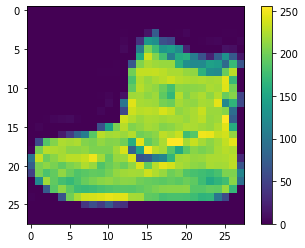

In [329]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

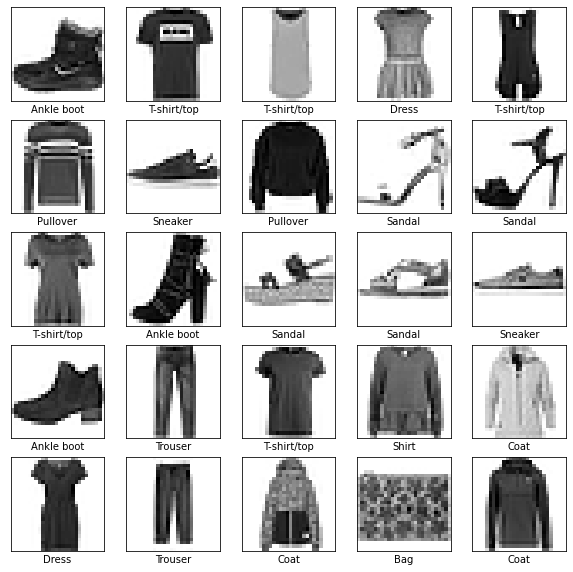

In [330]:
# 학습 이미지 확인
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [331]:
# 전처리
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


In [332]:
# 모델 생성
def getModel1(dropout_rate=0.0):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)))
    model.add(tf.keras.layers.Conv2D(32, [3, 3], padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D([2, 2], strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D([2, 2], strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Conv2D(128, [3, 3], padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D([2, 2], strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    return model

In [333]:
# 모델 생성
def getModel2(dropout_rate=0.0):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)))

    model.add(tf.keras.layers.Conv2D(32, [3, 3], padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(32, [3, 3], padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D([2, 2], strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Conv2D(64, [3, 3], padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D([2, 2], strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Conv2D(128, [3, 3], padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D([2, 2], strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Conv2D(256, [3, 3], padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D([2, 2], strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    return model

In [334]:
# 모델 생성
def getModel_BN(dropout_rate=0.0):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)))

    model.add(tf.keras.layers.Conv2D(32, [3, 3], padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    
    model.add(tf.keras.layers.Conv2D(32, [3, 3], padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D([2, 2], strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Conv2D(64, [3, 3], padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Conv2D(64, [3, 3], padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D([2, 2], strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Conv2D(128, [3, 3], padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Conv2D(128, [3, 3], padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D([2, 2], strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1024))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    return model

In [335]:
rotate_and_flip = tf.keras.Sequential([
                tf.keras.layers.RandomFlip('horizontal', input_shape=(28, 28)),
                tf.keras.layers.RandomRotation(0.1)])

In [336]:
# model = tf.keras.Sequential([
#     rotate_and_flip,
#     getModel2(0.3)])
model = getModel2(0.3)
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_19 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_113 (Dropout)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 14, 14, 64)      

In [337]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True,
                                            monitor='val_loss')

In [338]:
nb_batch = 256
nb_epoch = 100
data_augmentation = True

In [339]:
hist = model.fit(train_images, train_labels, batch_size=nb_batch, epochs=nb_epoch,
                verbose=1, validation_data=(test_images, test_labels), 
                callbacks=[callback])

Epoch 1/100
235/235 [==============================] - 4s 16ms/step - loss: 0.7751 - accuracy: 0.7070 - val_loss: 0.4792 - val_accuracy: 0.8219
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.4208 - accuracy: 0.8429 - val_loss: 0.3533 - val_accuracy: 0.8706
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3479 - accuracy: 0.8720 - val_loss: 0.3111 - val_accuracy: 0.8828
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3076 - accuracy: 0.8864 - val_loss: 0.2705 - val_accuracy: 0.9011
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2820 - accuracy: 0.8964 - val_loss: 0.2496 - val_accuracy: 0.9089
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2622 - accuracy: 0.9033 - val_loss: 0.2432 - val_accuracy: 0.9092
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2472 - accuracy: 0.9080 - val_loss: 0.2304 - val_accuracy:

In [340]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy: {:.1f}%'.format(test_acc * 100))
# 모델1 약 92.5%
# 모델2 약 93.5%
# 모델BN 약 93.5%

313/313 - 1s - loss: 0.1856 - accuracy: 0.9346

Test accuracy: 93.5%


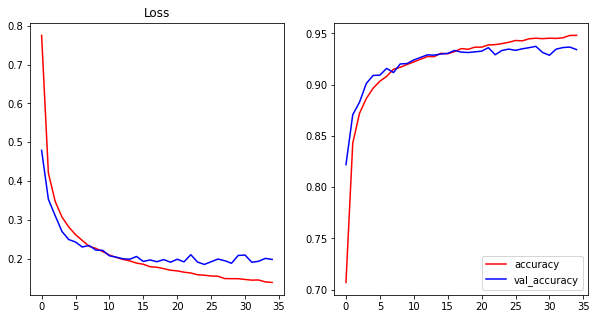

In [341]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'r-', label='loss')
plt.plot(hist.history['val_loss'], 'b-', label='val_loss')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], 'r-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'b-', label='val_accuracy')
plt.legend()
plt.show()

In [342]:
# 학습 결과 테스트를 이미지화 함수
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [343]:
# Test 이미지 예측
predictions = model.predict(test_images)

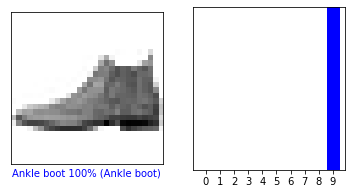

In [344]:
# 예측 결과 1개만 이미지화
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

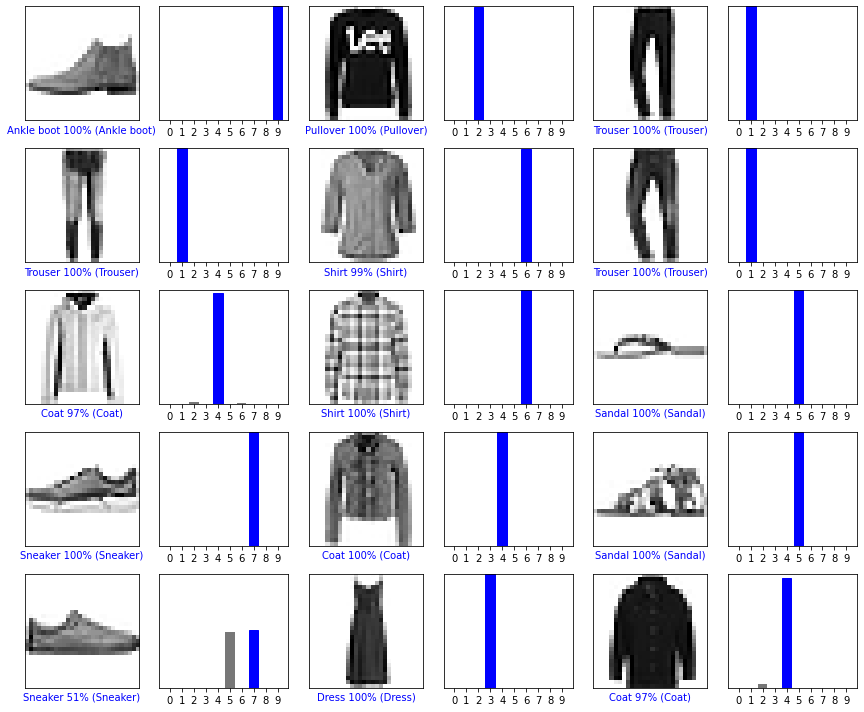

In [345]:
# 예측 결과 이미지화
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()